<a href="https://colab.research.google.com/github/krishnasidhvi/Capstone_DATA606/blob/main/number_plate_detection_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 7.2 MB/s eta 0:00:00


In [2]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow


Download data

In [3]:
!curl -L "https://public.roboflow.com/ds/Fvu9AlEvjv?key=TdHG7wYWk4" > roboflow.zip 
!unzip roboflow.zip 
!rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   4382      0 --:--:-- --:--:-- --:--:--  4382
100 10.2M  100 10.2M    0     0  16.3M      0 --:--:-- --:--:-- --:--:--     0
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/b15d6c0bdf90226d_jpg.rf.775557ba6aaf7d76a8d4bb04f66d8fc5.jpg  
 extracting: test/images/b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg  
 extracting: test/images/b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg  
 extracting: test/images/b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg  
 extracting: test/images/b32671b7cc279583_jpg.rf.f898026e2169a3b6adc4d21aee6d06c5.jpg  
 extracting: test/images/b3b61da98e22cd4a_jpg.rf.e5f31065702d6

Loading images into numpy arrays

In [4]:
image_array = [] 
for img_file in os.listdir('./train/images/'):
  
  img = cv2.imread('./train/images/'+img_file)
  image_array.append(img)

Show first five images

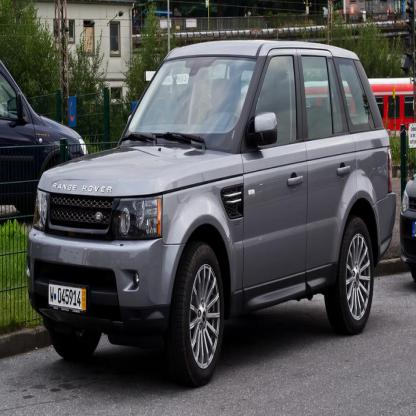

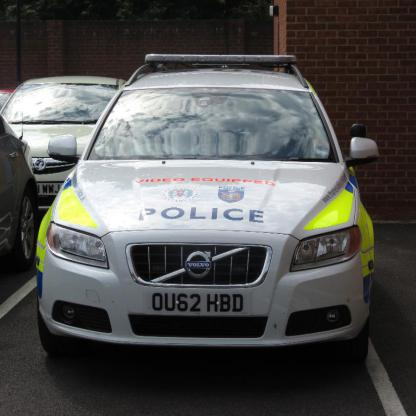

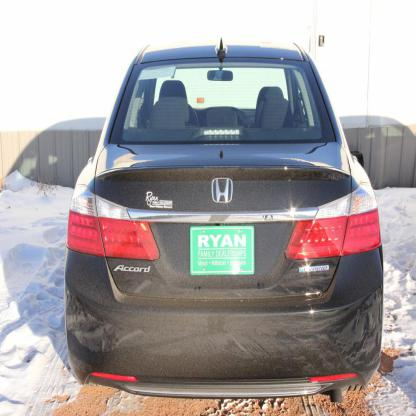

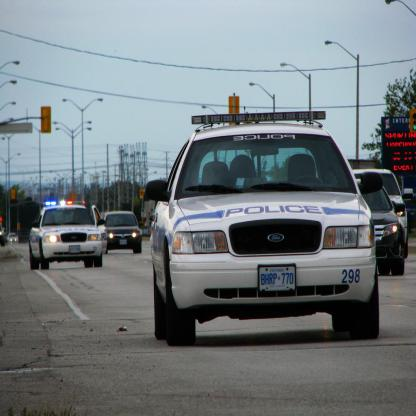

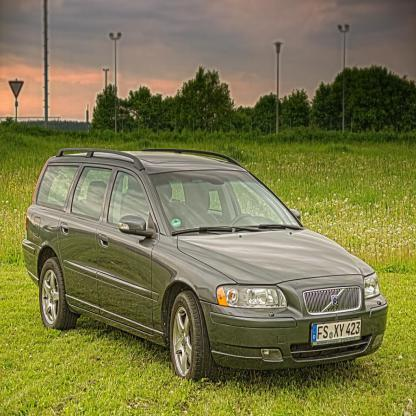

In [5]:
for i in range(5):
  cv2_imshow(image_array[i])

Preprocessing : resize

In [6]:
def resize_all_images(imaage_array, size = [640,640] ):
  image_array_resized = []
  for img in image_array:
    image_array_resized = cv2.resize(img, size)
  return image_array_resized

In [7]:
image_array_resized = resize_all_images(image_array)

Apply yolo number plate detection

In [8]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")  

model.train(data="data.yaml", epochs=10)  



100%|██████████| 6.23M/6.23M [00:00<00:00, 78.3MB/s]
Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=

In [9]:
metrics = model.val()  
results = model("https://ultralytics.com/images/bus.jpg")  # predict on an image
success = model.export(format="onnx")  

Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/valid/labels.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:19<00:00,  3.92s/it]
                   all         70        218      0.849      0.796      0.845      0.636
         license-plate         70         84      0.886      0.845      0.859      0.634
               vehicle         70        134      0.812      0.746      0.832      0.638
Speed: 3.4ms preprocess, 245.0ms inference, 0.0ms loss, 14.3ms postprocess per image
Results saved to runs/detect/val

100%|██████████| 476k/476k [00:00<00:00, 71.4MB/s]
image 1/1 /content/bus.jpg: 640x480 1 vehicle, 230.9ms
Speed: 4.7ms preprocess, 230.9ms inference, 4.1ms postprocess per image at shape (1, 3, 640, 640)
Ultralytic

============= Diagnostic Run torch.onnx.export version 2.0.0+cu118 =============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



In [10]:
results = model("/content/train/images/003a5aaf6d17c917_jpg.rf.60e9d14047fc5cd445db13a7bb7264d4.jpg")


image 1/1 /content/train/images/003a5aaf6d17c917_jpg.rf.60e9d14047fc5cd445db13a7bb7264d4.jpg: 640x640 1 license-plate, 1 vehicle, 186.6ms
Speed: 3.2ms preprocess, 186.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


In [11]:
results

[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'license-plate', 1: 'vehicle'}
 orig_img: array([[[254, 248, 249],
         [252, 247, 246],
         [224, 219, 218],
         ...,
         [210, 213, 217],
         [210, 213, 217],
         [209, 212, 216]],
 
        [[255, 254, 255],
         [251, 246, 245],
         [243, 238, 235],
         ...,
         [211, 214, 218],
         [211, 214, 218],
         [210, 213, 217]],
 
        [[255, 255, 254],
         [249, 245, 244],
         [255, 252, 248],
         ...,
         [214, 215, 219],
         [214, 215, 219],
         [214, 215, 219]],
 
        ...,
 
        [[ 97, 132, 188],
         [103, 141, 195],
         [108, 148, 201],
         ...,
         [144, 157, 173],
         [141, 155, 173],
         [135, 149, 167]],
 
        [[107, 144, 202],
         [107, 146, 201],
         [104, 143, 1

In [12]:
inputs = image_array[6].copy()
results = model(inputs)  # List of Results objects
results


0: 640x640 1 license-plate, 1 vehicle, 188.5ms
Speed: 4.3ms preprocess, 188.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.yolo.engine.results.Results object with attributes:
 
 boxes: ultralytics.yolo.engine.results.Boxes object
 keypoints: None
 keys: ['boxes']
 masks: None
 names: {0: 'license-plate', 1: 'vehicle'}
 orig_img: array([[[ 26, 185, 165],
         [ 15, 169, 150],
         [ 13, 158, 144],
         ...,
         [ 22,  38,  37],
         [ 19,  38,  46],
         [ 37,  59,  71]],
 
        [[ 26, 185, 165],
         [ 16, 170, 151],
         [ 14, 159, 145],
         ...,
         [ 22,  40,  41],
         [ 13,  34,  42],
         [ 23,  47,  59]],
 
        [[ 27, 186, 166],
         [ 17, 171, 152],
         [ 15, 160, 146],
         ...,
         [ 43,  66,  68],
         [ 36,  63,  73],
         [ 38,  67,  81]],
 
        ...,
 
        [[136, 130, 135],
         [134, 131, 133],
         [134, 130, 135],
         ...,
         [209, 208, 212],
         [200, 199, 203],
         [144, 143, 147]],
 
        [[124, 136, 140],
         [128, 141, 143],
         [131, 142, 1

In [13]:
for result in results:
    rects = result.boxes.xyxy.numpy()
    for rect in rects:
      rect = [int(i) for i in rect]
      
      inputs = cv2.rectangle(inputs,(rect[0],rect[1]),(rect[2],rect[3]),(0,255,0),3)
    

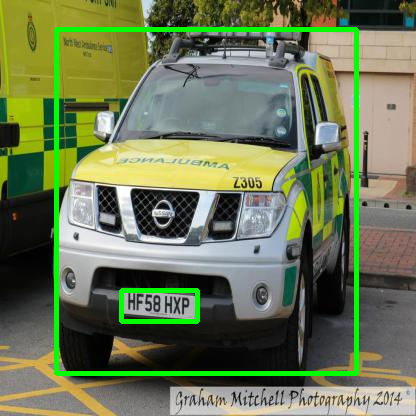

In [14]:
cv2_imshow(inputs)


In [15]:
inputs = image_array[6].copy()
results = model(inputs)  # List of Results objects

plates = []
for result in results:
    classes = result.boxes.cls
    rects = result.boxes.xyxy.numpy()
    license_rects = []
    for rect_id in range(len(rects)):
      if int(classes[rect_id]) == 0:
        license_rects.append([int(i) for i in rects[rect_id]])
    for rect in license_rects:
      plates.append(inputs[rect[1]:rect[3], rect[0]:rect[2]].copy())
      


0: 640x640 1 license-plate, 1 vehicle, 325.4ms
Speed: 4.4ms preprocess, 325.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


In [16]:
for plate in plates:
  cv2_imshow(plate)

**Text Segmentation**

In [17]:
!mkdir text_segmentation
!cd text_segmentation

In [18]:
!curl -L "https://universe.roboflow.com/ds/ZNVQfjt4cZ?key=FtOtETXNyu" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   894  100   894    0     0   5228      0 --:--:-- --:--:-- --:--:--  5258
100 31.3M  100 31.3M    0     0  45.5M      0 --:--:-- --:--:-- --:--:--  186M
Archive:  roboflow.zip
replace README.dataset.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
 extracting: test/images/1346845109736845318_jpg.rf.0b7fc966223e94c3226e80cd67cb864b.jpg  
 extracting: test/images/1346845109736845318_jpg.rf.7fa132154632469bd1b8ee5c44747b4c.jpg  
 extracting: test/images/1346845109736845318_jpg.rf.81eabc5159aa9a03df443559664a4eb2.jpg  
 extracting: test/images/1346845109736845318_jpg.rf.96a89acd063cf71f0e7d51610110e15f.jpg  
 extracting: test/images/1346845109736845318_jpg.rf.a6730b52ef394febde2d0873155d12a8.jpg  
 extracting: test/images

In [19]:
from ultralytics import YOLO

txt_model = YOLO("yolov8n.pt")  

txt_model.train(data="data.yaml", epochs=10)  



Ultralytics YOLOv8.0.89 🚀 Python-3.10.11 torch-2.0.0+cu118 CPU
yolo/engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=None, workspace=4, nms=False, lr0=0.01, 

In [20]:
names = ['-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '_', 'a', 'b', 'c', 'comma', 'd', 'dot', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
for plate in plates:
  results = txt_model(plate)

  digits = []
  for result in results:
      classes = result.boxes.cls
      for dig_class in classes:
        digits.append(names[dig_class])

  print("The registration number of the vehicle is :",''.join(digits))


0: 288x640 (no detections), 168.0ms
Speed: 3.1ms preprocess, 168.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


The registration number of the vehicle is : 


In [21]:
license_plate_img = inputs[rect[1]:rect[3], rect[0]:rect[2]].copy()
license_plate_img = cv2.resize(license_plate_img,(640,128))

In [22]:

license_plate_gray = cv2.cvtColor(license_plate_img,cv2.COLOR_BGR2GRAY)
thresh_inv = cv2.adaptiveThreshold(license_plate_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,39,1)

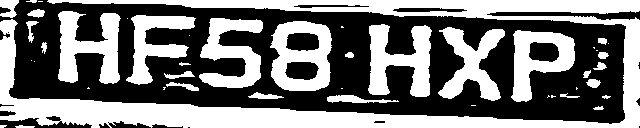

In [23]:
cv2_imshow(thresh_inv)

In [24]:
ctrs, _ = cv2.findContours(thresh_inv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [25]:
sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

In [26]:
img_area = license_plate_img.shape[0]*license_plate_img.shape[1]
for i, ctr in enumerate(sorted_ctrs):
    x, y, w, h = cv2.boundingRect(ctr)
    roi_area = w*h
    roi_ratio = roi_area/img_area
    if((roi_ratio >= 0.015) and (roi_ratio < 0.09)):
      if ((h>1.2*w) and (3*w>=h)):
        license_plate_img = cv2.rectangle(license_plate_img,(x,y),( x + w, y + h ),(90,0,255),2)

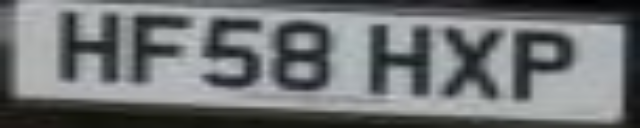

In [27]:
cv2_imshow(license_plate_img)

**Text recognition**

In [28]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Colab Notebooks/input"

Mounted at /content/gdrive


In [29]:
!kaggle datasets download -d dhruvildave/english-handwritten-characters-dataset

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /content/gdrive/MyDrive/Colab Notebooks/input. Or use the environment method.
